In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn import model_selection as mdl
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as met
from sklearn.pipeline import Pipeline
from imblearn import pipeline as imbPipe
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import model_selection as mdl
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn import svm
from sklearn import preprocessing as pre
from sklearn import metrics as met
from sklearn import linear_model as lin
from sklearn import impute as imp
from sklearn.experimental import enable_iterative_imputer
from sklearn import tree
from sklearn import ensemble as ens
from sklearn.base import TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelBinarizer, OneHotEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [31]:

df_train = pd.read_csv('term-deposit-marketing-2020.csv')


for i in df_train.columns:
    print(i)

df_train.head()


age
job
marital
education
default
balance
housing
loan
contact
day
month
duration
campaign
y


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [32]:
df_train.isna().sum()

#There are not any missing values.

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [33]:
print(np.shape(df_train))

(40000, 14)


In [34]:
print(df_train['y'].describe())

#So if we create an algorithm which says no to everyone, then the accuracy will be 37104/40000 which is %92.76
#So our baseline will be 0.9276 accuracy and we will try to beat this accuracy.

count     40000
unique        2
top          no
freq      37104
Name: y, dtype: object


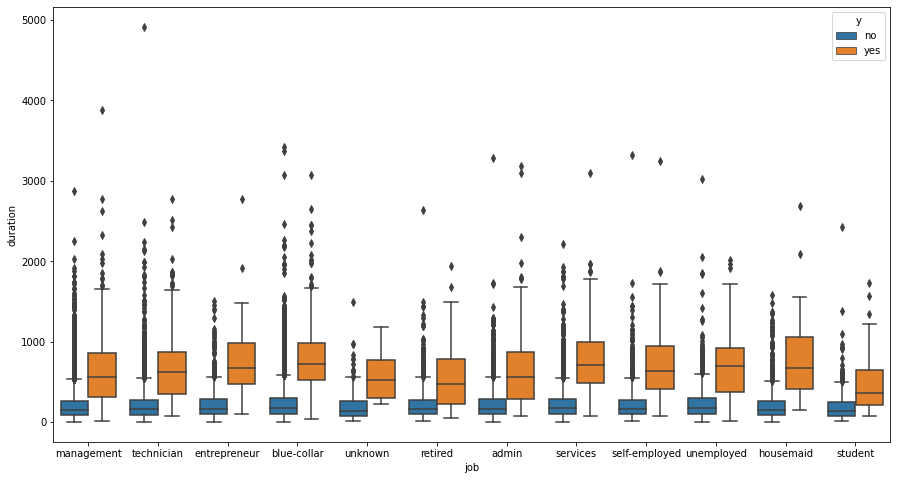

In [35]:
plt.figure(figsize=(15,8))
sns.boxplot(x="job", y="duration", data=df_train, hue="y")

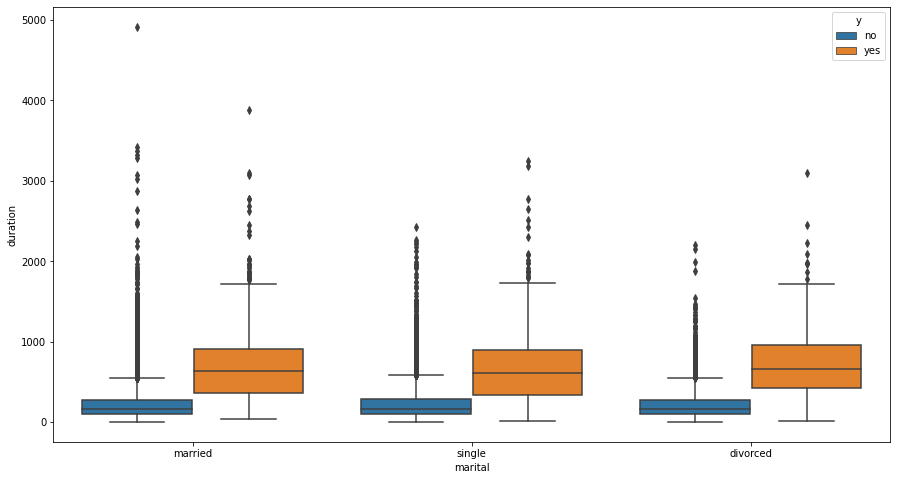

In [43]:
plt.figure(figsize=(15,8))
sns.boxplot(x="marital", y="duration", data=df_train, hue="y")

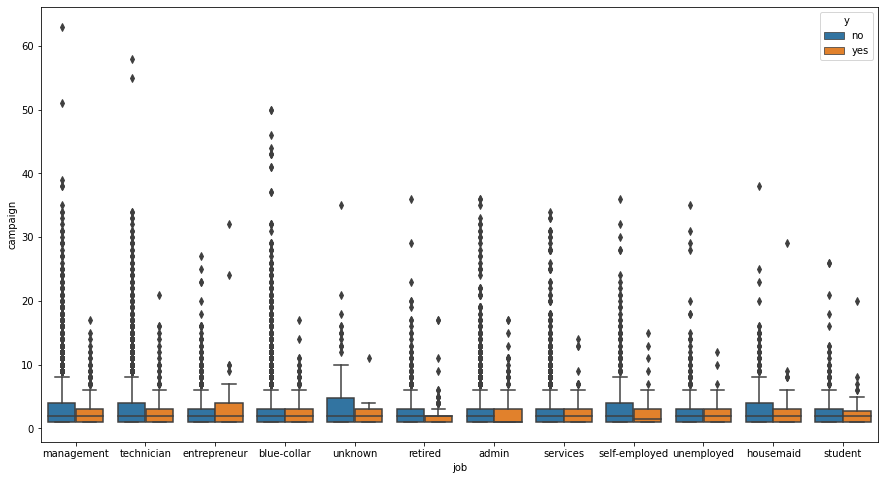

In [41]:
plt.figure(figsize=(15,8))
sns.boxplot(x="job", y="campaign", data=df_train, hue="y")

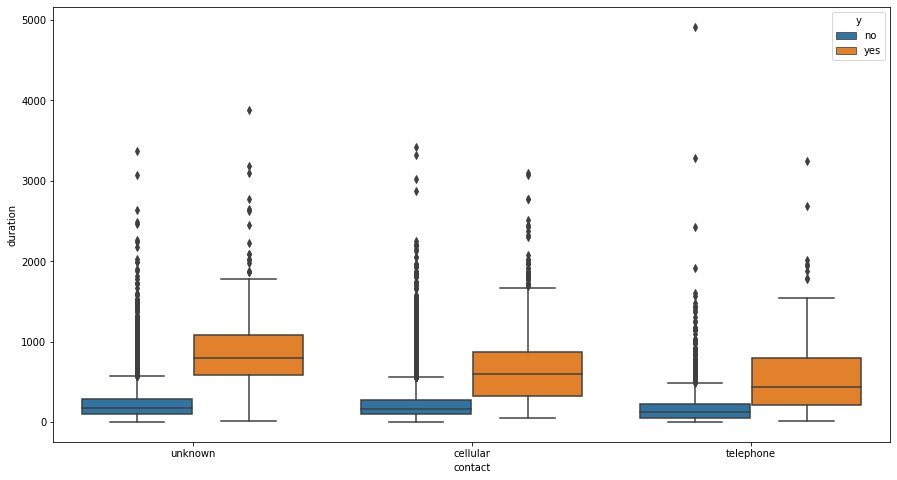

In [36]:
plt.figure(figsize=(15,8))
sns.boxplot(x="contact", y="duration", data=df_train, hue="y")

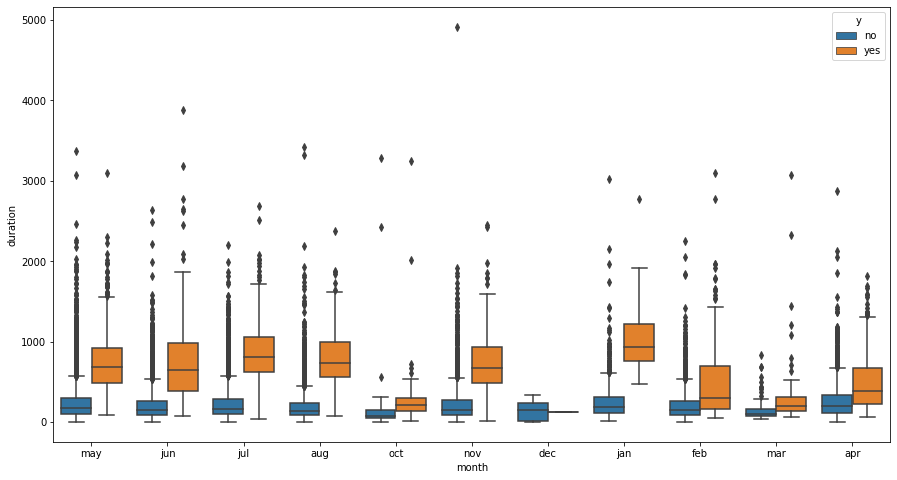

In [37]:
plt.figure(figsize=(15,8))
sns.boxplot(x="month", y="duration", data=df_train, hue="y")

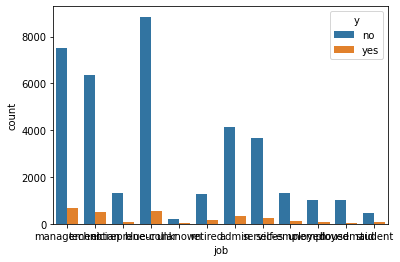

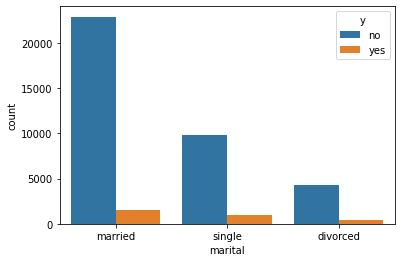

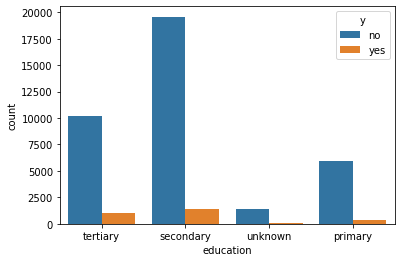

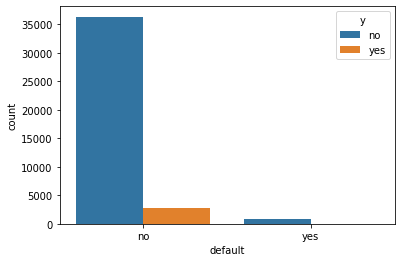

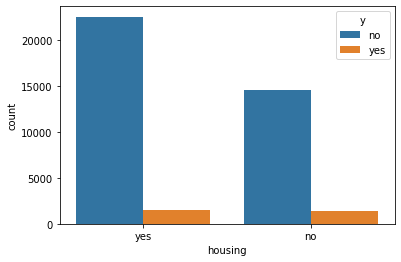

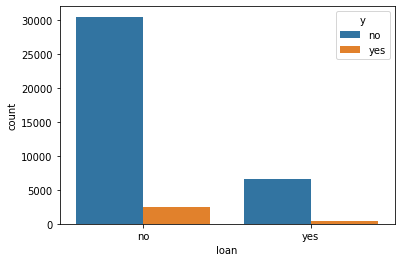

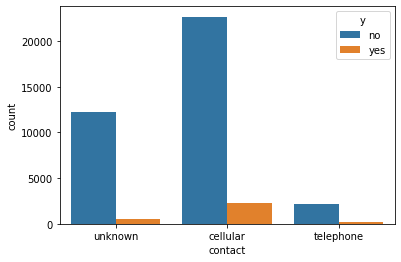

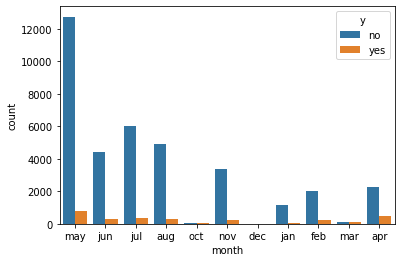

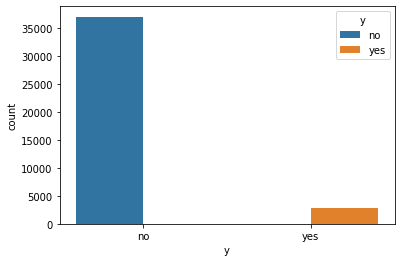

In [40]:
 for i in df_train.select_dtypes(include="object").columns:
   plt.figure()
   sns.countplot(x=i, hue="y", data=df_train)

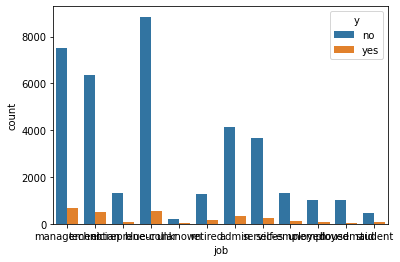

In [25]:
sns.countplot(x="job", hue="y", data=df_train)

In [ ]:
print(df_train[[i for i in df_train.columns]].describe())

# Describe for numeric columns

                age        balance           day      duration      campaign
count  40000.000000   40000.000000  40000.000000  40000.000000  40000.000000
mean      40.544600    1274.277550     16.017225    254.824300      2.882175
std        9.641776    2903.769716      8.278127    259.366498      3.239051
min       19.000000   -8019.000000      1.000000      0.000000      1.000000
25%       33.000000      54.000000      8.000000    100.000000      1.000000
50%       39.000000     407.000000     17.000000    175.000000      2.000000
75%       48.000000    1319.000000     21.000000    313.000000      3.000000
max       95.000000  102127.000000     31.000000   4918.000000     63.000000


In [ ]:
print(df_train['job'].describe())
print(df_train['marital'].describe())
print(df_train['education'].describe())
print(df_train['default'].describe())
print(df_train['housing'].describe())
print(df_train['loan'].describe())
print(df_train['contact'].describe())
print(df_train['month'].describe())


count           40000
unique             12
top       blue-collar
freq             9383
Name: job, dtype: object
count       40000
unique          3
top       married
freq        24386
Name: marital, dtype: object
count         40000
unique            4
top       secondary
freq          20993
Name: education, dtype: object
count     40000
unique        2
top          no
freq      39191
Name: default, dtype: object
count     40000
unique        2
top         yes
freq      24031
Name: housing, dtype: object
count     40000
unique        2
top          no
freq      33070
Name: loan, dtype: object
count        40000
unique           3
top       cellular
freq         24914
Name: contact, dtype: object
count     40000
unique       11
top         may
freq      13532
Name: month, dtype: object
count     40000
unique        2
top          no
freq      37104
Name: y, dtype: object


In [44]:
X_train = df_train[df_train.columns.difference(['y'])]
y_train = df_train['y']

In [45]:
pipe_num = Pipeline([
                     ("scaler", pre.StandardScaler()),
                     ("imp", imp.IterativeImputer())
])

pipe_cat = Pipeline([
                     ("imp", imp.SimpleImputer(strategy="most_frequent")),
                     ("onehot", pre.OneHotEncoder(handle_unknown="ignore"))
])

ct = ColumnTransformer([
                      ("num", pipe_num, X_train.select_dtypes(exclude="object").columns), # numeric
                      ("cat", pipe_cat, X_train.select_dtypes(include="object").columns) # categoric
])

ct.fit_transform(X_train)

<40000x44 sparse matrix of type '<class 'numpy.float64'>'
	with 520000 stored elements in Compressed Sparse Row format>

In [ ]:
X_train.head()

,age,balance,campaign,contact,day,default,duration,education,housing,job,loan,marital,month
0,58,2143,1,unknown,5,no,261,tertiary,yes,management,no,married,may
1,44,29,1,unknown,5,no,151,secondary,yes,technician,no,single,may
2,33,2,1,unknown,5,no,76,secondary,yes,entrepreneur,yes,married,may
3,47,1506,1,unknown,5,no,92,unknown,yes,blue-collar,no,married,may
4,33,1,1,unknown,5,no,198,unknown,no,unknown,no,single,may


In [ ]:
pipe = imbPipe.Pipeline([("ct", ct),
                         ("smote", SMOTE(sampling_strategy=0.3)),
                         ("sgd", SGDClassifier())
])

params = {
    "sgd__loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "sgd__alpha" : [0.0001, 0.001, 0.01, 0.1],
    "sgd__penalty" : ["l2", "l1", "none"],
}

grid = mdl.GridSearchCV(pipe, params, cv=5)
grid.fit(X_train, y_train)



In [50]:
grid.best_params_

{'sgd__alpha': 0.1, 'sgd__loss': 'hinge', 'sgd__penalty': 'l1'}

In [52]:
y_pred = grid.best_estimator_.predict(X_train)
print(met.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          no       0.96      0.96      0.96     37104
         yes       0.49      0.45      0.47      2896

    accuracy                           0.93     40000
   macro avg       0.72      0.71      0.71     40000
weighted avg       0.92      0.93      0.92     40000



In [ ]:
pipe = imbPipe.Pipeline([("ct", ct),
                         ("ploy", PolynomialFeatures()),
                         ("smote", SMOTE(sampling_strategy=0.3)),
                         ("sgd", SGDClassifier())
])



params = {
    "sgd__loss" : ["hinge"],
    "sgd__alpha" : [0.1],
    "sgd__penalty" : ["l1"],
    "ploy__degree" : [1,2]
}

grid = mdl.GridSearchCV(pipe, params, cv=5)

grid.fit(X_train, y_train)



In [55]:
grid.best_params_

{'ploy__degree': 2,
 'sgd__alpha': 0.1,
 'sgd__loss': 'hinge',
 'sgd__penalty': 'l1'}

In [56]:
y_pred = grid.best_estimator_.predict(X_train)
print(met.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          no       0.95      0.98      0.96     37104
         yes       0.56      0.33      0.42      2896

    accuracy                           0.93     40000
   macro avg       0.75      0.66      0.69     40000
weighted avg       0.92      0.93      0.92     40000



In [ ]:
pipe = imbPipe.Pipeline([("ct", ct),
                         ("ploy", PolynomialFeatures()),
                         ("smote", SMOTE(sampling_strategy=0.3)),
                         ("sgd", SGDClassifier())
])



params = {
    "sgd__loss" : ["hinge"],
    "sgd__alpha" : [0.1],
    "sgd__penalty" : ["l1"],
    "ploy__degree" : [2],
    "smote__sampling_strategy" : [0.15,0.2,0.25,0.3,0.35,0.4]
}

grid = mdl.GridSearchCV(pipe, params, cv=5)

grid.fit(X_train, y_train)



In [59]:
grid.best_params_

{'ploy__degree': 2,
 'sgd__alpha': 0.1,
 'sgd__loss': 'hinge',
 'sgd__penalty': 'l1',
 'smote__sampling_strategy': 0.25}

In [60]:
y_pred = grid.best_estimator_.predict(X_train)
print(met.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          no       0.95      0.98      0.96     37104
         yes       0.58      0.27      0.37      2896

    accuracy                           0.93     40000
   macro avg       0.76      0.63      0.67     40000
weighted avg       0.92      0.93      0.92     40000

